In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import networkx as nx


--------------------------------------------- Utilities ---------------------------------------

In [3]:
def xlsx_to_csv(filepath):
    xlsx_file = filepath
    csv_file = 'data.csv'
    data = pd.read_excel(xlsx_file, engine='openpyxl')
    data.to_csv(csv_file, index=False)
    return data

In [4]:
def extractSheet(filePath, sheetName):
    xlsx_file = pd.ExcelFile(filePath,engine='openpyxl')
    df = xlsx_file.parse(sheetName)
    return df

In [5]:
def get_json_nodes(df, colms, base_column):
    df = df[colms]
    df = df.rename(columns = {base_column:'id'})
    jData = json.loads(df.to_json(orient='records'))
    return jData

----------------------------------------------------------------

##### ------------------------------------------------ Adding Patients to the network ------------------------------------------------

In [10]:
#filepath = '/home/dataiku/workspace/code_studio-versioned/Market_Simulation/data/mkt_network_setup_2.xlsx'
filepath = '\\\\wpushh01\dinfopln\DSRD\SIM\V116\Exercises\Exercise2\graph_trials\mkt_network_setup_2B.xlsx'

In [11]:
df_consumers = extractSheet(filepath, '0.Consumers')

In [12]:
df_consumers.head()

,integer_node_id,Consumer_ID,agent_type,age,gender,recd_vac,Unnamed: 6,str_id_type,str_age,str_gender,str_recd_vac,concatenated string
0,1,C1,0,90,M,1,NaN,"""nid"": 1, ""atype"": 0, ""aid"": ""C1""","""age"": 90","""gender"": ""M""","""recd_vac"": 1","{""nid"": 1, ""atype"": 0, ""aid"": ""C1"", ""age""..."
1,2,C2,0,76,F,0,NaN,"""nid"": 2, ""atype"": 0, ""aid"": ""C2""","""age"": 76","""gender"": ""F""","""recd_vac"": 0","{""nid"": 2, ""atype"": 0, ""aid"": ""C2"", ""age""..."
2,3,C3,0,52,F,0,NaN,"""nid"": 3, ""atype"": 0, ""aid"": ""C3""","""age"": 52","""gender"": ""F""","""recd_vac"": 0","{""nid"": 3, ""atype"": 0, ""aid"": ""C3"", ""age""..."
3,4,C4,0,52,F,0,NaN,"""nid"": 4, ""atype"": 0, ""aid"": ""C4""","""age"": 52","""gender"": ""F""","""recd_vac"": 0","{""nid"": 4, ""atype"": 0, ""aid"": ""C4"", ""age""..."
4,5,C5,0,80,M,0,NaN,"""nid"": 5, ""atype"": 0, ""aid"": ""C5""","""age"": 80","""gender"": ""M""","""recd_vac"": 0","{""nid"": 5, ""atype"": 0, ""aid"": ""C5"", ""age""..."


In [13]:
df_consumers = df_consumers.rename(columns={'Consumer_ID':'agent_id'})

In [14]:
jData = get_json_nodes(df_consumers, ['integer_node_id','agent_id','agent_type','age','gender','recd_vac'],'integer_node_id')

In [15]:
print(jData)

[{'id': 1, 'agent_id': 'C1', 'agent_type': 0, 'age': 90, 'gender': 'M', 'recd_vac': 1}, {'id': 2, 'agent_id': 'C2', 'agent_type': 0, 'age': 76, 'gender': 'F', 'recd_vac': 0}, {'id': 3, 'agent_id': 'C3', 'agent_type': 0, 'age': 52, 'gender': 'F', 'recd_vac': 0}, {'id': 4, 'agent_id': 'C4', 'agent_type': 0, 'age': 52, 'gender': 'F', 'recd_vac': 0}, {'id': 5, 'agent_id': 'C5', 'agent_type': 0, 'age': 80, 'gender': 'M', 'recd_vac': 0}, {'id': 6, 'agent_id': 'C6', 'agent_type': 0, 'age': 90, 'gender': 'M', 'recd_vac': 0}, {'id': 7, 'agent_id': 'C7', 'agent_type': 0, 'age': 88, 'gender': 'F', 'recd_vac': 1}, {'id': 8, 'agent_id': 'C8', 'agent_type': 0, 'age': 51, 'gender': 'M', 'recd_vac': 0}, {'id': 9, 'agent_id': 'C9', 'agent_type': 0, 'age': 78, 'gender': 'M', 'recd_vac': 0}, {'id': 10, 'agent_id': 'C10', 'agent_type': 0, 'age': 73, 'gender': 'F', 'recd_vac': 0}, {'id': 11, 'agent_id': 'C11', 'agent_type': 0, 'age': 57, 'gender': 'M', 'recd_vac': 0}, {'id': 12, 'agent_id': 'C12', 'agent_t

In [16]:
G = nx.Graph()

In [17]:
data1 = nx.node_link_data(G)

In [18]:
data1

{'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [], 'links': []}

In [19]:
data1['nodes'] = jData

In [20]:
data1['links'] = []

In [21]:
H = nx.node_link_graph(data1)

In [22]:
H.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [23]:
H

In [24]:
print(H.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [25]:
H.nodes[5]

{'agent_id': 'C5', 'agent_type': 0, 'age': 80, 'gender': 'M', 'recd_vac': 0}

##### ------------------------------------------------ Adding HCPs to the network ------------------------------------------------

In [26]:
df_hcp = extractSheet(filepath, '1.Doctors(HCP)')

In [28]:
df_hcp

,integer_node_id,Physician_ID,agent_type,Specialty,Location,Unnamed: 5,str_id_type,str_specialty,str_location,concatenated string
0,1000000001,D1,1,PCP,11,NaN,"""nid"": 1000000001, ""atype"": 1, ""aid"": ""D1""","""Specialty"": ""PCP""","""Location"": ""011""","{""nid"": 1000000001, ""atype"": 1, ""aid"": ""D..."
1,1000000002,D2,1,SP,11,NaN,"""nid"": 1000000002, ""atype"": 1, ""aid"": ""D2""","""Specialty"": ""SP""","""Location"": ""011""","{""nid"": 1000000002, ""atype"": 1, ""aid"": ""D..."
2,1000000003,D3,1,SP,11,NaN,"""nid"": 1000000003, ""atype"": 1, ""aid"": ""D3""","""Specialty"": ""SP""","""Location"": ""011""","{""nid"": 1000000003, ""atype"": 1, ""aid"": ""D..."
3,1000000004,D4,1,PCP,213,NaN,"""nid"": 1000000004, ""atype"": 1, ""aid"": ""D4""","""Specialty"": ""PCP""","""Location"": ""213""","{""nid"": 1000000004, ""atype"": 1, ""aid"": ""D..."
4,1000000005,D5,1,PCP,213,NaN,"""nid"": 1000000005, ""atype"": 1, ""aid"": ""D5""","""Specialty"": ""PCP""","""Location"": ""213""","{""nid"": 1000000005, ""atype"": 1, ""aid"": ""D..."
5,1000000006,D6,1,PCP,213,NaN,"""nid"": 1000000006, ""atype"": 1, ""aid"": ""D6""","""Specialty"": ""PCP""","""Location"": ""213""","{""nid"": 1000000006, ""atype"": 1, ""aid"": ""D..."
6,1000000007,D7,1,PCP,213,NaN,"""nid"": 1000000007, ""atype"": 1, ""aid"": ""D7""","""Specialty"": ""PCP""","""Location"": ""213""","{""nid"": 1000000007, ""atype"": 1, ""aid"": ""D..."
7,1000000008,D8,1,SP,213,NaN,"""nid"": 1000000008, ""atype"": 1, ""aid"": ""D8""","""Specialty"": ""SP""","""Location"": ""213""","{""nid"": 1000000008, ""atype"": 1, ""aid"": ""D..."


In [29]:
df_hcp = df_hcp.rename(columns={'Physician_ID':'agent_id'})

In [30]:
hcp_nodes = get_json_nodes(df_hcp,['integer_node_id','agent_id','agent_type','Specialty','Location'],'integer_node_id')

In [31]:
H.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [33]:
hcp_nodes

[{'id': 1000000001,
  'agent_id': 'D1',
  'agent_type': 1,
  'Specialty': 'PCP',
  'Location': 11},
 {'id': 1000000002,
  'agent_id': 'D2',
  'agent_type': 1,
  'Specialty': 'SP',
  'Location': 11},
 {'id': 1000000003,
  'agent_id': 'D3',
  'agent_type': 1,
  'Specialty': 'SP',
  'Location': 11},
 {'id': 1000000004,
  'agent_id': 'D4',
  'agent_type': 1,
  'Specialty': 'PCP',
  'Location': 213},
 {'id': 1000000005,
  'agent_id': 'D5',
  'agent_type': 1,
  'Specialty': 'PCP',
  'Location': 213},
 {'id': 1000000006,
  'agent_id': 'D6',
  'agent_type': 1,
  'Specialty': 'PCP',
  'Location': 213},
 {'id': 1000000007,
  'agent_id': 'D7',
  'agent_type': 1,
  'Specialty': 'PCP',
  'Location': 213},
 {'id': 1000000008,
  'agent_id': 'D8',
  'agent_type': 1,
  'Specialty': 'SP',
  'Location': 213}]

In [34]:
H = nx.node_link_data(H)

In [35]:
some

NameError: name 'some' is not defined

In [264]:
H['nodes']

[{'agent_id': 'C1',
  'agent_type': 0,
  'age': 90,
  'gender': 'M',
  'recd_vac': 1,
  'id': 1},
 {'agent_id': 'C2',
  'agent_type': 0,
  'age': 76,
  'gender': 'F',
  'recd_vac': 0,
  'id': 2},
 {'agent_id': 'C3',
  'agent_type': 0,
  'age': 52,
  'gender': 'F',
  'recd_vac': 0,
  'id': 3},
 {'agent_id': 'C4',
  'agent_type': 0,
  'age': 52,
  'gender': 'F',
  'recd_vac': 0,
  'id': 4},
 {'agent_id': 'C5',
  'agent_type': 0,
  'age': 80,
  'gender': 'M',
  'recd_vac': 0,
  'id': 5},
 {'agent_id': 'C6',
  'agent_type': 0,
  'age': 90,
  'gender': 'M',
  'recd_vac': 0,
  'id': 6},
 {'agent_id': 'C7',
  'agent_type': 0,
  'age': 88,
  'gender': 'F',
  'recd_vac': 1,
  'id': 7},
 {'agent_id': 'C8',
  'agent_type': 0,
  'age': 51,
  'gender': 'M',
  'recd_vac': 0,
  'id': 8},
 {'agent_id': 'C9',
  'agent_type': 0,
  'age': 78,
  'gender': 'M',
  'recd_vac': 0,
  'id': 9},
 {'agent_id': 'C10',
  'agent_type': 0,
  'age': 73,
  'gender': 'F',
  'recd_vac': 0,
  'id': 10},
 {'agent_id': 'C11

In [265]:
H['nodes'] = H['nodes'] + hcp_nodes

In [266]:
H = nx.node_link_graph(H)

In [267]:
H.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000000001, 1000000002, 1000000003, 1000000004, 1000000005, 1000000006, 1000000007, 1000000008))

In [268]:
edges_raw = extractSheet(filepath, 'Sheet1')

In [269]:
edges_pat_doc = edges_raw.head(15)

In [270]:
edges_pat_doc.head()

,source,target,value,Unnamed: 3,source node id,target node id,str_source,str_target,str_value,concatenated string,Unnamed: 10
0,C1,D1,CD,NaN,1,1000000001,"""source"": 1","""target"": 1000000001","""value"": ""CD""","{""source"": 1, ""target"": 1000000001, ""valu...",NaN
1,C2,D4,CD,NaN,2,1000000004,"""source"": 2","""target"": 1000000004","""value"": ""CD""","{""source"": 2, ""target"": 1000000004, ""valu...",NaN
2,C3,D3,CD,NaN,3,1000000003,"""source"": 3","""target"": 1000000003","""value"": ""CD""","{""source"": 3, ""target"": 1000000003, ""valu...",NaN
3,C5,D2,CD,NaN,5,1000000002,"""source"": 5","""target"": 1000000002","""value"": ""CD""","{""source"": 5, ""target"": 1000000002, ""valu...",NaN
4,C7,D1,CD,NaN,7,1000000001,"""source"": 7","""target"": 1000000001","""value"": ""CD""","{""source"": 7, ""target"": 1000000001, ""valu...",NaN


In [271]:
edges_pat_doc = edges_pat_doc[['source node id','target node id']]

In [272]:
edges_pat_doc

,source node id,target node id
0,1,1000000001
1,2,1000000004
2,3,1000000003
3,5,1000000002
4,7,1000000001
5,8,1000000003
6,9,1000000002
7,10,1000000004
8,11,1000000008
9,14,1000000007


In [273]:
edges_pat_doc = edges_pat_doc.rename(columns={'source node id':'source','target node id':'target'})

In [274]:
edges_main = json.loads(edges_pat_doc.to_json(orient='records'))

In [275]:
edges_main

[{'source': 1, 'target': 1000000001},
 {'source': 2, 'target': 1000000004},
 {'source': 3, 'target': 1000000003},
 {'source': 5, 'target': 1000000002},
 {'source': 7, 'target': 1000000001},
 {'source': 8, 'target': 1000000003},
 {'source': 9, 'target': 1000000002},
 {'source': 10, 'target': 1000000004},
 {'source': 11, 'target': 1000000008},
 {'source': 14, 'target': 1000000007},
 {'source': 15, 'target': 1000000006},
 {'source': 16, 'target': 1000000005},
 {'source': 17, 'target': 1000000005},
 {'source': 18, 'target': 1000000008},
 {'source': 19, 'target': 1000000006}]

In [276]:
H = nx.node_link_data(H)

In [277]:
H

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'agent_id': 'C1',
   'agent_type': 0,
   'age': 90,
   'gender': 'M',
   'recd_vac': 1,
   'id': 1},
  {'agent_id': 'C2',
   'agent_type': 0,
   'age': 76,
   'gender': 'F',
   'recd_vac': 0,
   'id': 2},
  {'agent_id': 'C3',
   'agent_type': 0,
   'age': 52,
   'gender': 'F',
   'recd_vac': 0,
   'id': 3},
  {'agent_id': 'C4',
   'agent_type': 0,
   'age': 52,
   'gender': 'F',
   'recd_vac': 0,
   'id': 4},
  {'agent_id': 'C5',
   'agent_type': 0,
   'age': 80,
   'gender': 'M',
   'recd_vac': 0,
   'id': 5},
  {'agent_id': 'C6',
   'agent_type': 0,
   'age': 90,
   'gender': 'M',
   'recd_vac': 0,
   'id': 6},
  {'agent_id': 'C7',
   'agent_type': 0,
   'age': 88,
   'gender': 'F',
   'recd_vac': 1,
   'id': 7},
  {'agent_id': 'C8',
   'agent_type': 0,
   'age': 51,
   'gender': 'M',
   'recd_vac': 0,
   'id': 8},
  {'agent_id': 'C9',
   'agent_type': 0,
   'age': 78,
   'gender': 'M',
   'recd_vac': 0,
   'id': 9},

In [278]:
H['links'] = edges_main

In [279]:
H

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'agent_id': 'C1',
   'agent_type': 0,
   'age': 90,
   'gender': 'M',
   'recd_vac': 1,
   'id': 1},
  {'agent_id': 'C2',
   'agent_type': 0,
   'age': 76,
   'gender': 'F',
   'recd_vac': 0,
   'id': 2},
  {'agent_id': 'C3',
   'agent_type': 0,
   'age': 52,
   'gender': 'F',
   'recd_vac': 0,
   'id': 3},
  {'agent_id': 'C4',
   'agent_type': 0,
   'age': 52,
   'gender': 'F',
   'recd_vac': 0,
   'id': 4},
  {'agent_id': 'C5',
   'agent_type': 0,
   'age': 80,
   'gender': 'M',
   'recd_vac': 0,
   'id': 5},
  {'agent_id': 'C6',
   'agent_type': 0,
   'age': 90,
   'gender': 'M',
   'recd_vac': 0,
   'id': 6},
  {'agent_id': 'C7',
   'agent_type': 0,
   'age': 88,
   'gender': 'F',
   'recd_vac': 1,
   'id': 7},
  {'agent_id': 'C8',
   'agent_type': 0,
   'age': 51,
   'gender': 'M',
   'recd_vac': 0,
   'id': 8},
  {'agent_id': 'C9',
   'agent_type': 0,
   'age': 78,
   'gender': 'M',
   'recd_vac': 0,
   'id': 9},

In [280]:
H = nx.node_link_graph(H)

In [281]:
H

In [282]:
H.edges

EdgeView([(1, 1000000001), (2, 1000000004), (3, 1000000003), (5, 1000000002), (7, 1000000001), (8, 1000000003), (9, 1000000002), (10, 1000000004), (11, 1000000008), (14, 1000000007), (15, 1000000006), (16, 1000000005), (17, 1000000005), (18, 1000000008), (19, 1000000006)])

In [283]:
H.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1000000001, 1000000002, 1000000003, 1000000004, 1000000005, 1000000006, 1000000007, 1000000008))

In [284]:
H

In [285]:
pos = nx.spring_layout(H)  # Layout algorithm for node positioning
node_labels = nx.get_node_attributes(H, 'agent_id')  # Label nodes by agent type
# edge_labels = {edge: '' for edge in edges}  # Empty edge labels

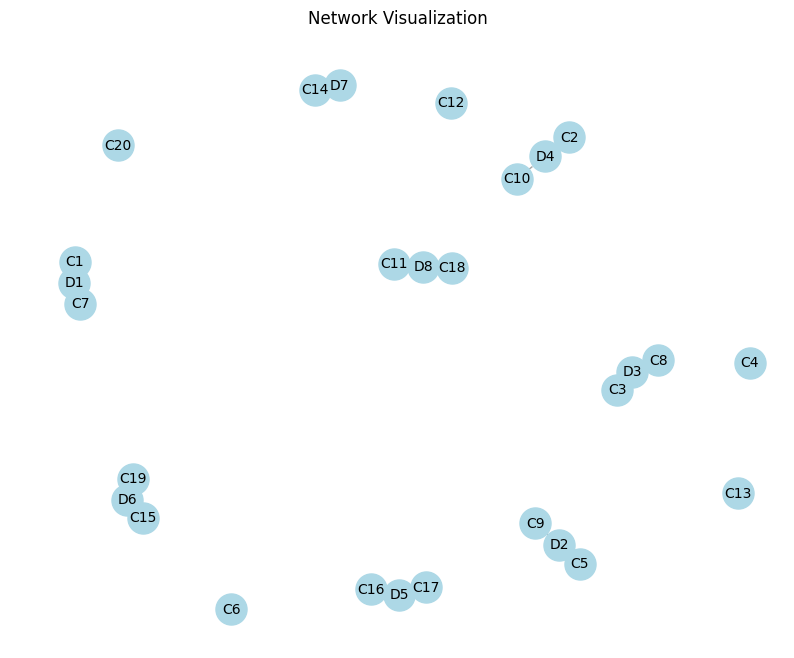

In [286]:
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(H, pos, width=1, alpha=0.7, edge_color='gray', style='dashed')
nx.draw_networkx_labels(H, pos, node_labels, font_size=10, font_color='black')
# nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=8)
plt.title('Network Visualization')
plt.axis('off')
plt.show()